In [1]:
import import_ipynb
import letter_recognition as data
import numpy as np
from sklearn import metrics

importing Jupyter notebook from letter_recognition.ipynb
[ 8  3 13 ..., 19 18  0]
[[ 5 12  3 ...,  8  4 10]
 [ 4 11  6 ...,  7  3  9]
 [ 7 11  6 ..., 10  2  8]
 ..., 
 [ 6  9  6 ..., 12  2  4]
 [ 2  3  4 ...,  9  5  8]
 [ 4  9  6 ...,  7  2  8]]
[12 19  2 ..., 22 10 13]


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [2]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(data.X_train)
print(pca.explained_variance_ratio_)

[ 0.26923768  0.16385698  0.10757638  0.08514216  0.06513765  0.06177365
  0.05559436  0.03947363  0.03719612  0.03068006  0.0264888   0.0165929
  0.01581497  0.01333959  0.00745171  0.00464336]


In [3]:
import matplotlib.pyplot as plt
#Plot Variance Ratio for PCA#Plot Var 
plt.bar(range(1, 17), pca.explained_variance_ratio_)
plt.xlabel('Principle Components',fontsize=18)
plt.ylabel('Explained Variance Ratio',fontsize=18)
plt.title('Letter_Recognition(Explained Variance vs Dimension)',fontsize=14)
plt.grid(True)
plt.show()
plt.clf()

<Figure size 640x480 with 1 Axes>

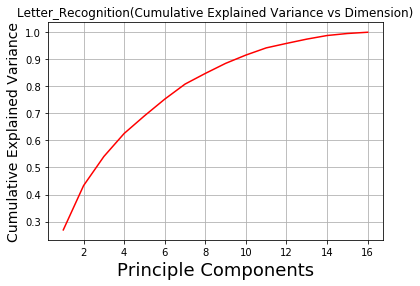

<Figure size 432x288 with 0 Axes>

In [4]:
cummulative_explained_variance_ = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, 17), cummulative_explained_variance_,color='red')
plt.xlabel('Principle Components',fontsize=18)
plt.ylabel('Cumulative Explained Variance',fontsize=14)
plt.title('Letter_Recognition(Cumulative Explained Variance vs Dimension)',fontsize=12)
plt.grid(True)
plt.show()
plt.clf()

In [5]:
X_pca = PCA(n_components=10).fit_transform(data.X_train)


In [6]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,31)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_pca)
    Sum_of_squared_distances.append(km.inertia_)

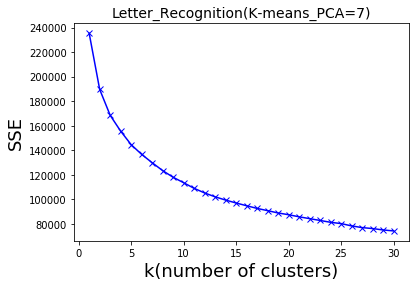

In [7]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k(number of clusters)',fontsize=18)
plt.ylabel('SSE',fontsize=18)
plt.title('Letter_Recognition(K-means_PCA=7)',fontsize=14)
plt.show()

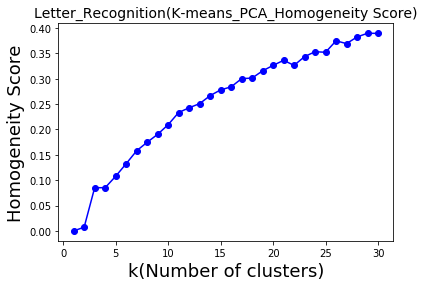

In [8]:
from sklearn import metrics
homogeneity_scores=[]
clusters=range(1,31)
for k in clusters:
    km = KMeans(n_clusters=k)
    km = km.fit(X_pca)
    lable = km.labels_
    homogeneity_scores.append(metrics.homogeneity_score(data.y_train,lable ))
plt.plot(clusters, homogeneity_scores,'bo-')
plt.xlabel('k(Number of clusters)',fontsize=18)
plt.ylabel('Homogeneity Score',fontsize=18)
plt.title('Letter_Recognition(K-means_PCA_Homogeneity Score)',fontsize=14)
plt.show()

Text(0.5,1,'Breast_Cancer(Kmeans_PCA)')

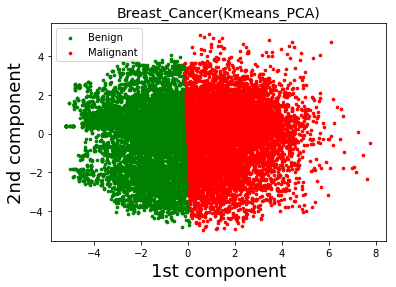

In [9]:
# PCA-kmeans Plot

clf = KMeans(init='k-means++', n_clusters=2, random_state=42)
clf.fit_predict(X_pca)

k = 2 # number of clusters
colors = ['g', 'r', 'b', 'y', 'c', 'm']
labels = ['Benign', 'Malignant']

# fix labels
clusters_kmeans = np.choose(clf.labels_, [1, 0])

fig, ax = plt.subplots()
for i in range(k):
    points = np.array([X_pca[j] for j in range(len(X_pca)) if clf.labels_[j] == i])
    ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i], label=labels[i])


plt.xlabel("1st component",fontsize=18)
plt.ylabel("2nd component",fontsize=18)
plt.legend(loc=2)
plt.title('Breast_Cancer(Kmeans_PCA)',fontsize=14)


In [10]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
acc = []
for i in range (1, 31):
    X_pca = PCA(n_components=i).fit_transform(X)
    print(X_pca)
    #clf = DecisionTreeClassifier(max_depth=5)
    clf = KMeans(init='k-means++',n_clusters=2)
    clf.fit(X_pca)
    pred = clf.labels_
    acc.append(accuracy_score(pred, y))
print(acc)

NameError: name 'X' is not defined

In [ ]:
plt.plot(range(1, 31), acc)
plt.xlabel('Principle Components')
plt.ylabel('KNN Acc')
plt.title('acc')
plt.show()
plt.clf()

In [11]:
from sklearn.mixture import GaussianMixture as GMM
ll=[]
bic=[]
homogeinity_scores=[]
completeness_scores=[]
clusters=range(1,31)
model = GMM(covariance_type = 'full')
for k in clusters:
            model.set_params(n_components=k)
            model.fit(X_pca)
            labels = model.predict(X_pca)
            ll.append(model.score(X_pca))
            bic.append(model.bic(X_pca))
            homogeinity_scores.append(metrics.homogeneity_score(data.y_train,labels))
            completeness_scores.append(metrics.completeness_score(data.y_train,labels))
print(bic)

[479294.56208728667, 450545.66149509401, 437391.20072278474, 423065.56367551954, 412063.84164007113, 402169.46913869341, 382946.4299366902, 386853.93155766232, 380656.56535311084, 377430.50299819419, 367040.91420582868, 360562.39094983577, 361947.59910037823, 354683.31574921112, 345482.31220885093, 351035.11936398508, 350443.7591872593, 342176.18946045107, 338004.86174444703, 336634.9330161055, 340273.00570865494, 334121.26775880239, 328542.67776871787, 325650.73479669454, 325864.34149148792, 327144.09540880786, 326108.26061982219, 322721.83249412291, 325024.21389783156, 321836.16769713425]


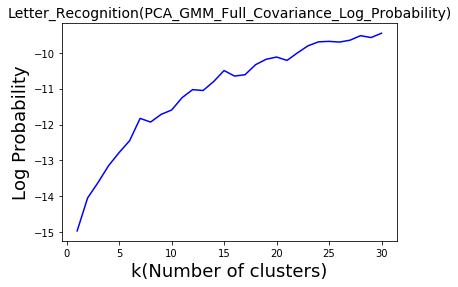

In [12]:
plt.plot(clusters, ll, color='blue')
plt.xlabel('k(Number of clusters)',fontsize=18)
plt.ylabel('Log Probability',fontsize=18);
plt.title('Letter_Recognition(PCA_GMM_Full_Covariance_Log_Probability)',fontsize=14)
plt.show()

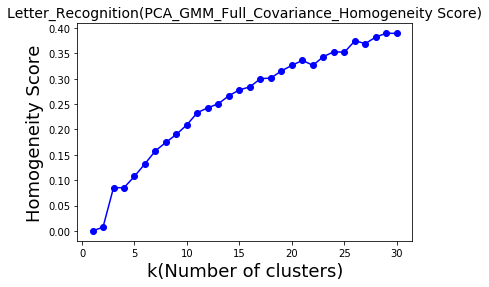

In [13]:
plt.plot(clusters, homogeneity_scores,'bo-')
plt.xlabel('k(Number of clusters)',fontsize=18)
plt.ylabel('Homogeneity Score',fontsize=18)
plt.title('Letter_Recognition(PCA_GMM_Full_Covariance_Homogeneity Score)',fontsize=14)
plt.show()

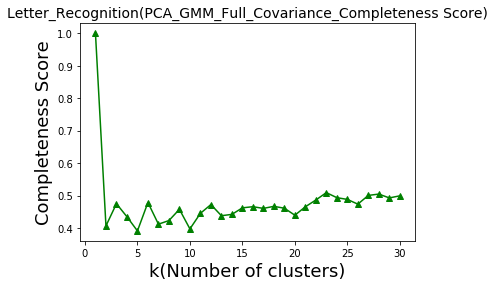

In [14]:

plt.plot(clusters, completeness_scores,'g^-')
plt.xlabel('k(Number of clusters)',fontsize=18)
plt.ylabel('Completeness Score',fontsize=18)
plt.title('Letter_Recognition(PCA_GMM_Full_Covariance_Completeness Score)',fontsize=14)
plt.show()

In [ ]:
bic2=[595681.06407176226, 553912.25273492467, 530720.20033587876, 503221.70012021047, 447283.22086607729, 451825.70017588028, 443626.98389246903, 433674.53006708872, 416415.4066152898, 408596.82664275123, 376019.60288024443, 368610.86938890023, 336976.97505033674, 333373.30356770469, 329729.61742094712, 324451.01867622038, 324126.36980339658, 312213.14488639543, 314093.54577524349, 322679.1090524015, 359128.46439727867, 307443.77934851486, 305634.81837944919, 291955.04050467932, 287172.57117379352, 328037.28389575653, 323025.78966321622, 321714.43428913783, 290333.67651900218, 275310.26912355283]
plt.plot(clusters, bic,'g^-',label='PCA BIC')
plt.plot(clusters, bic2,'bo-',label='RAW BIC')
plt.legend(loc='upper right')
plt.xlabel('k(Number of clusters)',fontsize=18)
plt.ylabel('BIC_score',fontsize=18)
plt.title('Letter_Recognition(GMM_BIC VS PCA_GMM_BIC)',fontsize=14)
plt.show()